In [ ]:
# 제목: 파이썬(folium)을 활용한 지도 관리
# !pip install folium


   ---- -----------------------------------  1/10 [urllib3]
   ---- -----------------------------------  1/10 [urllib3]
   ---- -----------------------------------  1/10 [urllib3]
   ---- -----------------------------------  1/10 [urllib3]
   ---- -----------------------------------  1/10 [urllib3]
   -------- -------------------------------  2/10 [MarkupSafe]
   ------------ ---------------------------  3/10 [idna]
   ---------------- -----------------------  4/10 [charset_normalizer]
   ---------------- -----------------------  4/10 [charset_normalizer]
   ---------------- -----------------------  4/10 [charset_normalizer]
   ------------------------ ---------------  6/10 [requests]
   ------------------------ ---------------  6/10 [requests]
   ------------------------ ---------------  6/10 [requests]
   ---------------------------- -----------  7/10 [jinja2]
   ---------------------------- -----------  7/10 [jinja2]
   ---------------------------- -----------  7/10 [jinja2]
   ---

In [5]:
import folium

# 지도 생성
m = folium.Map(location=[37.57, 127.04], zoom_start=12)  # 위도와 경도
m.save("./ch04/start_map.html")  # 지도를 HTML 파일로 저장

In [ ]:
import folium

# 지도 생성
m = folium.Map(location=[37.57, 127.04], zoom_start=12,
               tiles="Cartodb dark_matter")  # 위도와 경도
m.save("./ch04/start_map1.html")  # 지도를 HTML 파일로 저장

In [9]:
attr = ('Map data: &copy; OpenStreetMap France | &copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors')

tiles = 'https://{s}.tile.openstreetmap.fr/osmfr/{z}/{x}/{y}.png'

m = folium.Map(location=[37.57, 127.04], zoom_start=12,
               tiles=tiles, attr=attr)  # 위도와 경도
m.save("./ch04/start_map3.html")  # 지도를 HTML 파일로 저장

In [11]:
# 마커 찍기
seoul_map = folium.Map(location=[37.55,126.98], zoom_start=12)

folium.Marker([37.57, 127.04], popup='청년취업사관학교 동대문', 
              icon=folium.Icon(color='blue',icon='star')).add_to(seoul_map)
seoul_map.save("./ch04/seoul_map1.html")

In [13]:
import pandas as pd

df = pd.read_excel('./ch04/서울지역 대학교 위치.xlsx')
df.head(2)

,Unnamed: 0,위도,경도
0,KAIST 서울캠퍼스,37.592573,127.046737
1,KC대학교,37.548345,126.854797


In [14]:
df = df.set_index('Unnamed: 0', drop=True)
df.head(2)

,위도,경도
Unnamed: 0,,
KAIST 서울캠퍼스,37.592573,127.046737
KC대학교,37.548345,126.854797


In [ ]:
import pandas as pd

df = pd.read_excel('./ch04/서울지역 대학교 위치.xlsx')
df = df.set_index('Unnamed: 0', drop=True)

m = folium.Map(location=[37.55,126.98], zoom_start=12)
for name in df.index:
    lat = df.loc[name, '위도']
    lon = df.loc[name, '경도']
    folium.CircleMarker([lat, lon], popup=name, 
                  color='brown', fill=True, fill_color='coral', 
                  fill_opacity=0.6).add_to(m)
m.save("./ch04/seoul_univ.html")

In [16]:
import pandas as pd
import json     
# 경기도 인구변화 데이터를 불러와서 데이터프레임으로 변환
# index_col: 인덱스컬럼 지정
df = pd.read_excel('./ch04/경기도인구데이터.xlsx', index_col='구분')
df.columns = df.columns.map(str)  # 컬럼명을 문자열로 변환

geo_data = json.load(open('./ch04/경기도행정구역경계.json',encoding='utf-8'))

In [21]:
geo_data['features'][0]['geometry']['coordinates']

[[[127.56113535909492, 37.6256560539258],
  [127.57290963929243, 37.61087369350498],
  [127.56366973908277, 37.5842624297699],
  [127.52226606559191, 37.5828628697518],
  [127.50048767007603, 37.569036373178626],
  [127.47687473909174, 37.574448241913856],
  [127.47565866803647, 37.60512112601634],
  [127.44699730711024, 37.64497584741164],
  [127.4272349102434, 37.66284420898682],
  [127.40156700708162, 37.64806970784708],
  [127.3732642199939, 37.6453987554284],
  [127.3542931884407, 37.6250006376975],
  [127.34360057873045, 37.588997440929354],
  [127.31002843450217, 37.53523876142835],
  [127.30923294884336, 37.5135706079458],
  [127.32809611134748, 37.53133849534739],
  [127.3663244453597, 37.52716845880826],
  [127.38286320755414, 37.50147517965334],
  [127.39046783039153, 37.47413422098595],
  [127.37490698722792, 37.455072688441305],
  [127.39174400683049, 37.4256483411369],
  [127.40276739880215, 37.41856433413549],
  [127.4250053080982, 37.43669952587185],
  [127.481790030457

In [23]:
g_map = folium.Map(location=[37.3,127.3], zoom_start=9, 
                   tiles='Cartodb dark_matter') 
year = '2017'

folium.Choropleth(geo_data=geo_data, # GeoJSON 데이터
                  data=df[year], #데이터프레임
                  columns=[df.index, df[year]], # 인덱스, 값
                  fill_color='YlOrRd', # 색상
                  fill_opacity=0.7, # 투명도
                  line_opacity=0.3, # 선 투명도
                  threshold_scale = [10000, 100000, 300000, 500000, 700000],
                  key_on='feature.properties.name').add_to(g_map)
g_map.save('./ch04/g_map.html')

https://www.data.go.kr/data/15013104/standard.do

## 공공데이터포털 전국문화축제 표준데이터   
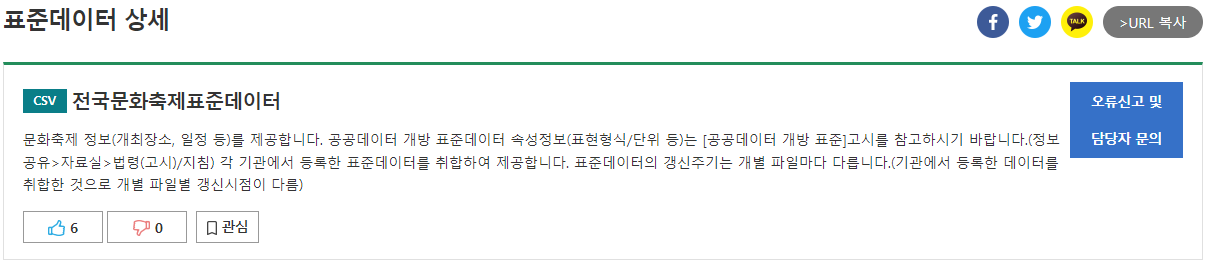

In [1]:
import pandas as pd
import folium

df = pd.read_csv('./ch04/전국문화축제표준데이터.csv',encoding='euc-kr')
df.head(3)

,축제명,개최장소,축제시작일자,축제종료일자,축제내용,주관기관명,주최기관명,후원기관명,전화번호,홈페이지주소,관련정보,소재지도로명주소,소재지지번주소,위도,경도,데이터기준일자,제공기관코드,제공기관명
0,제5회 강릉 비치비어페스티벌,경포해변 중앙광장,2025-06-27,2025-06-29,전국 브루어리 맥주+로컬푸드+플로깅+비어도슨트+플리마켓+라이브공연+디제잉파티,강릉비치비어페스티벌추진위원회,강원특별자치도 강릉시청,NaN,033-640-5130,NaN,NaN,강원특별자치도 강릉시 창해로 514,강원특별자치도 강릉시 안현동 산1-9,37.805797,128.907474,2025-03-04,4201000,강원특별자치도 강릉시
1,2025 경포 벚꽃 잔치,경포대 및 경포호 일원,2025-03-28,2025-04-02,"바다와 호수, 흩날리는 벚꽃 감상+시화전시+민속놀이 체험+공예체험+다도,약선차 시음...",강원특별자치도 강릉시청,강원특별자치도 강릉시청,NaN,033-640-5130,NaN,NaN,강원특별자치도 강릉시 창해로 514,강원특별자치도 강릉시 안현동 산1-9,37.805797,128.907474,2025-03-04,4201000,강원특별자치도 강릉시
2,2025 경포 썸머 페스티벌,경포해변 일원,2025-07-29,2025-08-04,무더운 여름에 시원한 경포 해변에서 열리는 야외 축제,강원특별자치도 강릉시청,강원특별자치도 강릉시청,NaN,033-640-5130,NaN,NaN,강원특별자치도 강릉시 경포로 365,강원특별자치도 강릉시 저동 94,37.795569,128.896539,2025-03-04,4201000,강원특별자치도 강릉시


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1313 entries, 0 to 1312
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   축제명       1313 non-null   object 
 1   개최장소      1313 non-null   object 
 2   축제시작일자    1313 non-null   object 
 3   축제종료일자    1313 non-null   object 
 4   축제내용      1313 non-null   object 
 5   주관기관명     1313 non-null   object 
 6   주최기관명     1313 non-null   object 
 7   후원기관명     568 non-null    object 
 8   전화번호      1216 non-null   object 
 9   홈페이지주소    815 non-null    object 
 10  관련정보      150 non-null    object 
 11  소재지도로명주소  1089 non-null   object 
 12  소재지지번주소   1022 non-null   object 
 13  위도        1048 non-null   float64
 14  경도        1048 non-null   float64
 15  데이터기준일자   1313 non-null   object 
 16  제공기관코드    1313 non-null   object 
 17  제공기관명     1313 non-null   object 
dtypes: float64(2), object(16)
memory usage: 184.8+ KB


In [3]:
del df['후원기관명']
del df['전화번호']
del df['홈페이지주소']
del df['관련정보']
del df['소재지지번주소']

df.columns

Index(['축제명', '개최장소', '축제시작일자', '축제종료일자', '축제내용', '주관기관명', '주최기관명', '소재지도로명주소',
       '위도', '경도', '데이터기준일자', '제공기관코드', '제공기관명'],
      dtype='object')

In [4]:
# df = df.rename(columns={df.columns[1]:'장소',
#                         df.columns[2]:'시작일자',
#                         df.columns[3]:'종료일자',
#                         df.columns[6]:'기관',
#                         df.columns[7]:'주소'})
# df.head(2)

In [5]:
df.columns = ['축제명', '장소', '시작일자', '종료일자', 
                '축제내용', '주관기관', '기관', '주소',
                '위도', '경도', '데이터기준일자', '제공기관코드', '제공기관명']
df.head(2)

,축제명,장소,시작일자,종료일자,축제내용,주관기관,기관,주소,위도,경도,데이터기준일자,제공기관코드,제공기관명
0,제5회 강릉 비치비어페스티벌,경포해변 중앙광장,2025-06-27,2025-06-29,전국 브루어리 맥주+로컬푸드+플로깅+비어도슨트+플리마켓+라이브공연+디제잉파티,강릉비치비어페스티벌추진위원회,강원특별자치도 강릉시청,강원특별자치도 강릉시 창해로 514,37.805797,128.907474,2025-03-04,4201000,강원특별자치도 강릉시
1,2025 경포 벚꽃 잔치,경포대 및 경포호 일원,2025-03-28,2025-04-02,"바다와 호수, 흩날리는 벚꽃 감상+시화전시+민속놀이 체험+공예체험+다도,약선차 시음...",강원특별자치도 강릉시청,강원특별자치도 강릉시청,강원특별자치도 강릉시 창해로 514,37.805797,128.907474,2025-03-04,4201000,강원특별자치도 강릉시


In [6]:
df[df['시작일자']>='2025-09-01']

,축제명,장소,시작일자,종료일자,축제내용,주관기관,기관,주소,위도,경도,데이터기준일자,제공기관코드,제공기관명
44,합천황토한우축제,합천군민체육공원,2025-10-10,2025-10-12,합천의 자랑인 황토한우의 맛과 품격을 알리는 축제,합천축협,경상남도 합천군청 축산과,경상남도 합천군 합천읍 문화로 62,35.560170,128.159868,2025-08-08,5480000,경상남도 합천군
45,황매산 억새축제,황매산군립공원,2025-10-11,2025-10-17,황매산 억새를 즐기는 축제,황매산축제위원회,경상남도 합천군청 산림과,경상남도 합천군 가회면 황매산공원길 4,35.481849,128.003749,2025-08-08,5480000,경상남도 합천군
46,대장경기록문화축제,대장경테마파크,2025-10-22,2025-10-26,전시 및 공연 등 기록문화를 느낄 수 있는 축제,경상남도 합천군청,경상남도 합천군청 관광진흥과,경상남도 합천군 가야면 가야산로 1160,35.767498,128.136536,2025-08-08,5480000,경상남도 합천군
47,수려한합천영화제,합천영상테마파크 + 합천군일원,2025-10-01,2025-10-05,합천영상테마파크를 중심으로 영화인과 관객이 어우러지는 영화문화축제,합천군관광협의회,경상남도 합천군청 관광진흥과,경상남도 합천군 용주면 합천호수로 757,35.548407,128.072840,2025-08-08,5480000,경상남도 합천군
84,청남대가을축제,청남대 일원,2025-10-25,2025-11-09,국화·조형물작품·야생화 전시+공연+체험,청남대관리사업소,충청북도청,충청북도 청주시 상당구 문의면 청남대길 646,NaN,NaN,2024-12-23,6430000,충청북도
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1299,역전 싱싱거리 페스타,역전시장,2025-09-20,2025-09-20,역전시장 싱싱거리 활성화 축제,전라남도 순천시,전라남도 순천시,전라남도 순천시 역전장길 9,34.943744,127.503331,2025-06-20,4820000,전라남도 순천시
1300,제12회 순천웃장 국밥축제,웃장,2025-09-21,2025-09-21,국밥 축제,전라남도 순천시,전라남도 순천시,전라남도 순천시 북부시장3길 67,34.958183,127.485353,2025-06-20,4820000,전라남도 순천시
1301,제2회 글로벌 콘텐츠 페스티벌 in 순천,오천그린광장 등,2025-10-17,2025-10-19,문화향유와 산업전이 융복합된 종합 문화콘텐츠 축제,전라남도 순천시,전라남도 순천시,NaN,34.933236,127.499563,2025-06-20,4820000,전라남도 순천시
1302,순천 대학로 축제,순천 대학로 일원,2025-10-01,2025-10-31,순천 대학로 축제,전라남도 순천시,전라남도 순천시,전라남도 순천시 중앙로 268,34.969627,127.484131,2025-06-20,4820000,전라남도 순천시


In [7]:
df[(df['기관'].str.contains('강원도'))]

,축제명,장소,시작일자,종료일자,축제내용,주관기관,기관,주소,위도,경도,데이터기준일자,제공기관코드,제공기관명
782,DMZ피스트레인 뮤직 페스티벌,고석정+노동당사+월정리역+소이산,2019-06-05,2019-06-09,"음악공연, 무용공연, 국제컨퍼런스 등",(사)피스트레인,강원도+철원군+서울시+(사)피스트레인,강원도 철원군 동송읍 태봉로 1825,38.187193,127.287820,2020-08-26,4301000,강원특별자치도 철원군
1271,에코아트페어 제로섬씽Zero-Somthing 2025,강원디자인진흥원,2025-10-17,2025-10-30,기후위기를 극복하는 제로 웨이스트 전시 형태,강원행복시대,강원도민일보,강원특별자치도 춘천시 서면 박사로 890 2동 1층,37.872616,127.729341,2025-07-09,4181000,강원특별자치도 춘천시


In [8]:
df[(df['주소'].str.contains('강원도'))]

ValueError: Cannot mask with non-boolean array containing NA / NaN values

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1313 entries, 0 to 1312
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   축제명      1313 non-null   object 
 1   장소       1313 non-null   object 
 2   시작일자     1313 non-null   object 
 3   종료일자     1313 non-null   object 
 4   축제내용     1313 non-null   object 
 5   주관기관     1313 non-null   object 
 6   기관       1313 non-null   object 
 7   주소       1089 non-null   object 
 8   위도       1048 non-null   float64
 9   경도       1048 non-null   float64
 10  데이터기준일자  1313 non-null   object 
 11  제공기관코드   1313 non-null   object 
 12  제공기관명    1313 non-null   object 
dtypes: float64(2), object(11)
memory usage: 133.5+ KB


In [10]:
df.dropna(axis=0, subset=['주소'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1089 entries, 0 to 1310
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   축제명      1089 non-null   object 
 1   장소       1089 non-null   object 
 2   시작일자     1089 non-null   object 
 3   종료일자     1089 non-null   object 
 4   축제내용     1089 non-null   object 
 5   주관기관     1089 non-null   object 
 6   기관       1089 non-null   object 
 7   주소       1089 non-null   object 
 8   위도       876 non-null    float64
 9   경도       876 non-null    float64
 10  데이터기준일자  1089 non-null   object 
 11  제공기관코드   1089 non-null   object 
 12  제공기관명    1089 non-null   object 
dtypes: float64(2), object(11)
memory usage: 119.1+ KB


In [11]:
df[(df['주소'].str.contains('강원도'))]

,축제명,장소,시작일자,종료일자,축제내용,주관기관,기관,주소,위도,경도,데이터기준일자,제공기관코드,제공기관명
719,제13회 철원 화강 다슬기축제,김화생활체육공원 및 화강 일원,2019-08-01,2019-08-04,"개막행사, 황금다슬기잡기 등 체험프로그램, 축하공연 등",철원군축제위원회,철원군,강원도 철원군 김화읍 청양로 649,38.249835,127.413659,2020-08-26,4301000,강원특별자치도 철원군
720,2019 송년콘서트 및 청소년페스티벌,철원실내체육관,2019-12-16,2019-12-17,"송년콘서트, 청소년페스티벌","철원군축제위원회, 철원교육지원청",철원군,강원도 철원군 갈말읍 갈말로 75,38.161341,127.303257,2020-08-26,4301000,강원특별자치도 철원군
781,철원 DMZ 평화 꽃송이 축제,고석정 꽃밭,2019-09-06,2019-10-06,"세종대왕 강무행차, k-pop공연, 꽃밭 주야간 개장 등",철원군축제위원회,철원군,강원도 철원군 동송읍 태봉로 1799-15,38.186762,127.291626,2020-08-26,4301000,강원특별자치도 철원군
782,DMZ피스트레인 뮤직 페스티벌,고석정+노동당사+월정리역+소이산,2019-06-05,2019-06-09,"음악공연, 무용공연, 국제컨퍼런스 등",(사)피스트레인,강원도+철원군+서울시+(사)피스트레인,강원도 철원군 동송읍 태봉로 1825,38.187193,127.287820,2020-08-26,4301000,강원특별자치도 철원군


In [12]:
True or True

True

In [13]:
df[(df['주소'].str.contains('제주')) & (df['시작일자']>='2025-09-26')]

,축제명,장소,시작일자,종료일자,축제내용,주관기관,기관,주소,위도,경도,데이터기준일자,제공기관코드,제공기관명
246,제17회 범도민 안전체험 한마당,제주시민복지타운광장,2025-09-26,2025-09-27,도내 최대의 안전문화 축제 제17회 범도민 안전체험 한마당이 9월 26일부터 27일...,제주특별자치도교육청,제주특별자치도,제주특별자치도 제주시 연삼로 286,33.491847,126.523851,2025-09-15,6500000,제주특별자치도
247,제 8회 하하페스티벌,산지천 복수구 광장 일원,2025-09-27,2025-09-27,음악으로 모이고 소비로 나누는 지역상생축제,제주특별자치도 제주시 일도1동 주민센터,제주특별자치도 제주시 일도1동 주민센터,제주특별자치도 제주시 칠성로길 48,33.514137,126.527778,2025-09-15,6500000,제주특별자치도
249,2025 두 발과 두 바퀴로 더 푸른 제주,<1일차> 애향운동장 및 연삼로 일대 <2일차> 구좌 해안도로 일원,2025-09-27,2025-09-28,제주특별자치도와 제주관광공사가 함께 준비한 2025 차 없는 거리 자전거 & 걷기 행사,제주관광공사,제주특별자치도,제주특별자치도 제주시 선덕로 23,33.486239,126.499244,2025-09-15,6500000,제주특별자치도
252,펠롱펠롱 빛 모드락,제주 목관아,2025-09-26,2025-10-19,‘탐라순력도’를 중심으로제주의 국가유산을 향유하고자 미디어아트로 재해석한 국가야간전...,제주특별자치도,국가유산진흥원,제주특별자치도 제주시 관덕로 25,33.514002,126.521805,2025-09-15,6500000,제주특별자치도
253,제 31회 서귀포칠십리축제,제주 천지연폭포 일원,2025-10-17,2025-10-19,서귀포 칠십리축제는 서귀포의 아름다운 자연과 어우러진 여유로움 속에서 색다른 문화를...,서귀포칠십리축제 추진위원회,제주특별자치도 서귀포시,제주특별자치도 서귀포시 남성중로 2-9,33.243836,126.559838,2025-09-15,6500000,제주특별자치도
254,제 64회 탐라문화제,탑동해변공연장 일대,2025-10-10,2025-10-14,"1962년 제1회 제주예술제로 시작하여 1965년 한라문화제, 2002년 탐라문화제...",(사)한국예총제주특별자치도연합회,제주특별자치도,제주특별자치도 제주시 중앙로 2,33.517924,126.524257,2025-09-15,6500000,제주특별자치도
255,2025 영천동해바라기축제,영천동주민센터 주변,2025-10-02,2025-10-04,"제주의 청명한 가을 하늘 아래, 해바라기와 사람. 음악과 맛이 함께 어우러지는 이 ...",영천동해바라기축제위원회,영천동주민센터,제주특별자치도 서귀포시 솔오름로105번길 24,33.285981,126.563755,2025-09-15,6500000,제주특별자치도
256,2025 제주올레걷기축제,올레 17.18코스,2025-11-06,2025-11-08,혼자 걸어도 좋지만 함께 걸으면 두 배 더 행복한 제주 대표 가을 축제,사단법인 제주올레,제주특별자치도,제주특별자치도 제주시 애월읍 광성로 94,33.458051,126.418088,2025-09-15,6500000,제주특별자치도
1053,탐라문화제,"제주도일원 (해변공연장, 탐라문화광장)",2025-10-10,2025-10-14,탐라문화제+기원문화축제+민속문화축제+예술문화축제+참여문화축제등,한국예총제주특별자치도연합회,제주특별자치도,제주특별자치도 제주시 중앙로 2,33.518148,126.523955,2025-08-25,B551011,한국관광공사


In [14]:
df[(df['주소'].str.contains('제주')) | (df['주소'].str.contains('창원'))]

,축제명,장소,시작일자,종료일자,축제내용,주관기관,기관,주소,위도,경도,데이터기준일자,제공기관코드,제공기관명
38,제30회 성산일출축제,서귀포시 성산일출봉 일원,2022-12-31,2023-01-01,코로나19 종식 기원 제주 큰굿+성산 10경+열린 음악회 등,제주특별자치도,성산일출축제위원회,제주특별자치도 서귀포시 성산읍 일출로 284-12,33.462234,126.936801,2025-06-24,6520000,제주특별자치도 서귀포시
39,제22회 최남단 방어축제,모슬포항 일원,2022-11-26,2022-12-25,청정 바다의 흥과멋과 맛의 향연,최남단방어축제위원회,최남단방어축제위원회,제주특별자치도 서귀포시 대정읍 최남단해안로 66,33.214499,126.252049,2025-06-24,6520000,제주특별자치도 서귀포시
40,제29회 덕수리 전통민속 재현행사,덕수리민속공연장 (제주조각공원운동장),2022-10-07,2022-10-08,전통민속 재현,덕수리민속보존회,덕수리마을회,제주특별자치도 서귀포시 안덕면 일주서로 1836,33.254130,126.322287,2025-06-24,6520000,제주특별자치도 서귀포시
41,2022 중문 칠선녀축제,중문관광단지 및 천제연폭포 일원,2022-11-05,2022-11-06,지역특화 콘텐츠 홍보+사진전,중문동연합청년회,중문칠선녀축제위원회,제주특별자치도 서귀포시 천제연로 132 중문관광단지,33.252662,126.418354,2025-06-24,6520000,제주특별자치도 서귀포시
42,제28회 제주 성읍마을 전통민속재현축제,제주성읍마을 남문광장,2022-10-09,2022-10-09,초가집줄놓기+전통혼례식 등,(사)성읍민속마을보존회+성읍1리 마을회,(사)성읍민속마을보존회+성읍1리 마을회,제주특별자치도 서귀포시 표선면 성읍정의현로 30,33.384904,126.801497,2025-06-24,6520000,제주특별자치도 서귀포시
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1053,탐라문화제,"제주도일원 (해변공연장, 탐라문화광장)",2025-10-10,2025-10-14,탐라문화제+기원문화축제+민속문화축제+예술문화축제+참여문화축제등,한국예총제주특별자치도연합회,제주특별자치도,제주특별자치도 제주시 중앙로 2,33.518148,126.523955,2025-08-25,B551011,한국관광공사
1137,제20회 예래생태체험축제,예래 논짓물 일원,2022-07-30,2022-07-31,생태마을탐방+맨손으로 넙치잡기+노래자랑 등,예래생태체험축제위원회,예래동주민자치위원회,제주특별자치도 서귀포시 예래해안로 256,33.236550,126.388752,2025-06-24,6520000,제주특별자치도 서귀포시
1138,제40회 서귀포유채꽃축제 (축제명칭 변경),가시리 유채꽃광장 일대,2023-03-31,2023-04-02,유채꽃밭 관람+공연+체험 등,서귀포유채꽃축제조직위원회,제주특별자치도 서귀포시,제주특별자치도 서귀포시 표선면 녹산로 381-15,33.383096,126.736285,2025-06-24,6520000,제주특별자치도 서귀포시
1139,제25회 서귀포유채꽃국제걷기대회,제주월드컵경기장 광장 및 서귀포시 일원,2023-03-25,2023-03-26,유채꽃 걷기 대회,(사)서귀포시관광협의회,제주특별자치도 서귀포시+(사)한국체육진흥회,제주특별자치도 서귀포시 월드컵로 33,33.246219,126.509275,2025-06-24,6520000,제주특별자치도 서귀포시


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1089 entries, 0 to 1310
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   축제명      1089 non-null   object 
 1   장소       1089 non-null   object 
 2   시작일자     1089 non-null   object 
 3   종료일자     1089 non-null   object 
 4   축제내용     1089 non-null   object 
 5   주관기관     1089 non-null   object 
 6   기관       1089 non-null   object 
 7   주소       1089 non-null   object 
 8   위도       876 non-null    float64
 9   경도       876 non-null    float64
 10  데이터기준일자  1089 non-null   object 
 11  제공기관코드   1089 non-null   object 
 12  제공기관명    1089 non-null   object 
dtypes: float64(2), object(11)
memory usage: 119.1+ KB


In [16]:
df.dropna(axis=0, subset=['위도','경도'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 876 entries, 0 to 1306
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   축제명      876 non-null    object 
 1   장소       876 non-null    object 
 2   시작일자     876 non-null    object 
 3   종료일자     876 non-null    object 
 4   축제내용     876 non-null    object 
 5   주관기관     876 non-null    object 
 6   기관       876 non-null    object 
 7   주소       876 non-null    object 
 8   위도       876 non-null    float64
 9   경도       876 non-null    float64
 10  데이터기준일자  876 non-null    object 
 11  제공기관코드   876 non-null    object 
 12  제공기관명    876 non-null    object 
dtypes: float64(2), object(11)
memory usage: 95.8+ KB


In [ ]:
ct = input('찾고자 하는 지역명을 입력하세요(예:제주,강원도) : ')
date = input('찾고자 하는 시작일자를 입력하세요(예:2025-09-01) : ')

df_final = df[(df['주소'].str.contains(ct)) & (df['시작일자']>=date)]
df_final

In [ ]:
center = [df_final.iloc[0,8],df_final.iloc[0,9]]
m = folium.Map(location=center, zoom_start=8,
                   tiles='Cartodb dark_matter')

for i in df_final.index:
    center = [df_final.loc[i,'위도'],df_final.loc[i,'경도']]
    folium.Marker(location=center, popup=df_final.loc[i,'축제명'],
                  icon=folium.Icon(color='red',icon='star')).add_to(m)
m.save(f'./ch04/festival_map_{ct}_{date}.html')

In [ ]:
def k_festival(df=df):
    ct = input('찾고자 하는 지역명을 입력하세요(예:제주,강원도) : ')
    Sdate = input('찾고자 하는 시작일자를 입력하세요(예:2025-09-01) : ')
    Edate = input('찾고자 하는 종료일자를 입력하세요(예:2025-10-01) : ')

    df_final = df[(df['주소'].str.contains(ct)) & (df['시작일자']>=Sdate) \
                  & (df['종료일자']<=Edate)]

    center = [df_final.iloc[0,8],df_final.iloc[0,9]]
    m = folium.Map(location=center, zoom_start=8)

    for i in df_final.index:
        center = [df_final.loc[i,'위도'],df_final.loc[i,'경도']]
        folium.Marker(location=center, popup=df_final.loc[i,'축제명'],
                    icon=folium.Icon(color='red',icon='star')).add_to(m)
    m.save(f'./ch04/festival_map_{ct}_{date}.html')

In [24]:
k_festival()